# Telecom User Sentiment Analysis: A Comparative Dataset of Positive and Negative Feedback
by JCDS2602 - Group 5: Clarinda Puspitajati, Hans Darmawan, and Ridha Shahnabiel Hayat

## Background
The telecommunications industry these days are highly competitive, and as we know, that customer satisfaction is playing a crucial role in maintaining market share. To get te informations, this is where the social media platforms, for example like `X.com`, *Twitter* or *X* are providing valuable insights into public sentiments, and concerns. We can understand what are the user of this Telecommunication Provider are mostly saying honestly about their user-experience using this certain Telecommunication Provider. By analyzing these platforms (in this case, we are getting the data from `X.com` from `Kaggle`), we can identify by getting or obtaining the key words or key points, to know and understand what to do next. For example how the company can improve and enhance its image, what to fix, what to improve, what should they do to next, after knowing the concern or problems that have been stated by the user in `Twitter` or `X.com` in their tweets.

## Problem Statement
The telecommunications industry is highly competitive, requiring companies to prioritize customer satisfaction to maintain market share. The main challenge is addressing and resolving customer complaints promptly to ensure a positive user experience and maintain brand reputation. Common issues include poor network quality (such as weak signals and dropped calls), slow or unresponsive customer service, and negative perceptions of service pricing. If left unresolved, these issues can reduce customer loyalty and impact company profitability.

  ## Gap Analysis
There are several key gaps between the company's performance and customer expectations that need to be addressed. The Service Quality Gap highlights discrepancies between promised network quality and actual user experiences, often reflected in complaints about signal stability and internet speed. The Communication Gap arises when companies fail to effectively communicate with customers, leading to confusion in resolving technical and service-related issues. Meanwhile, the Value Perception Gap occurs when customers feel that the services provided do not justify the costs, creating a negative brand perception. Bridging these gaps is crucial to improving customer satisfaction, strengthening brand loyalty, and maintaining a competitive edge.


# Insight Questions?
1. How do customers perceive the quality of network services provided?

2. What factors most influence customer satisfaction in the telecommunications industry?

3. How can the company align its service pricing with customer expectations?

## Preparation

The provided Python code conducts data analysis on a dataset of tweets concerning cellular service providers. It starts by importing essential libraries for data manipulation, visualization, and natural language processing. We load the dataset from a CSV file into a Pandas DataFrame. Along with the first rows of data, some basic information about the dataset is shown. Missing values and duplicates are checked for. Seaborn is used to make a count plot that shows how the sentiments are spread out. The names of the columns are also changed to make them easier to understand. This process gives information about the different kinds of feelings in the dataset. These steps lay the groundwork for more analysis and processing of the tweet data.

In [1]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import warnings
from nltk.stem import WordNetLemmatizer
import nltk

warnings.filterwarnings("ignore")

# Uncomment If Wordnet and Punkt Not Downloaded
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('punkt_tab')

In [2]:
# Load dataset
real_df = pd.read_csv("dataset_tweet_sentiment_cellular_service_provider.csv")
df = real_df.copy()
df.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          300 non-null    int64 
 1   Sentiment   300 non-null    object
 2   Text Tweet  300 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


The Id column in the DataFrame serves as a unique identifier for each entry, specifically for the tweets included in the dataset. Unique identifiers are important for managing data because it makes it easy to find and refer back to specific tweets during analysis. Having a separate ID column simplifies the analysis process to monitor and modify individual entries without confusion. This ensures the correct execution of tasks such as filtering, merging, or updating.

The Sentiment column groups the emotional tone or opinion shown in each tweet into different categories. This column includes labels such as "positive," "negative," or "neutral," which indicate how individuals feel about the corresponding tweet in the Text Tweet column. Finding out how people feel about different issues is a big part of understanding public opinion. This is especially true on social media sites where people share their thoughts on a wide range of issues. By putting tweets into groups based on how they make people feel, researchers and analysts can learn about trends, how people are reacting to events and issues, and how people feel in general about them.

The Text Tweet column contains the actual content of the tweets. This column stores the raw text posted by platform users, making it useful for sentiment analysis and other text-based tests. The text can vary significantly in length and content, ranging from brief comments to more extensive expressions of opinion. This column displays the words and lines people use to express their emotions. It also shows language trends and common themes. The Text Tweet column provides a wealth of information regarding the manner in which individuals communicate and express their emotions on social media.



In [4]:
# Check Missing Values
df.isnull().sum()

Id            0
Sentiment     0
Text Tweet    0
dtype: int64

The DataFrame exhibits a complete dataset with no missing values across all three columns: Id, Sentiment, and Text Tweet. The absence of missing values is essential for maintaining the integrity and reliability of any data analysis. If there are missing entries in a dataset, the analysis may not accurately reflect the whole population. These variations can cause results to be biased or insights to be incomplete. If there are 300 non-null entries in each column, it means that each tweet has a unique number, a label for its mood, and the text itself. As a result, a full analysis can be done without having to deal with missing data or fill in data that isn't there. This accelerates the analysis process.

In [5]:
# Check duplicated data
df.duplicated().sum()

0

In addition, the DataFrame doesn't have any duplicate values, which makes the dataset even better. There are no duplicate IDs for tweets, as each entry in the ID column is unique. This feature is crucial for maintaining the dataset's integrity. Because there are no duplicates in the Sentiment and Text Tweet columns, each sentiment label corresponds to a unique tweet. This method makes it possible to accurately and clearly analyze sentiment. The lack of duplicates makes sure that the analysis's results are accurate and reflect the real feelings being expressed in the tweets. All in all, the fact that there are no missing values or duplicates makes the dataset strong and ideal for further study and analysis.

In [6]:
# Rename Columns
df = df.rename(columns={"Id": "id", "Sentiment":"sentiment", "Text Tweet":"text_tweet"})
df.head()

,id,sentiment,text_tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


To make the names of columns look like snake case, they need to be formatted so that most of the letters are lowercase and underscores separate words.  Let's say "Text Tweet" changes to "text_tweet."  This is a good habit for more than one reason.  First, the snake case makes it easier to read, so users can quickly figure out what each column is for.  Additionally, it makes sure that rules for naming things are always followed. This is especially helpful when working with big datasets or other people, as it lowers the chance of mistakes that could happen because of different naming styles.

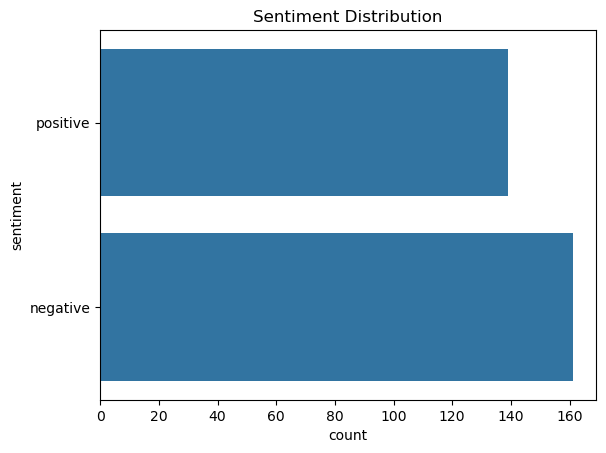

In [7]:
# Cek Sentiment Distribution
sentiment_count = sns.countplot(df["sentiment"])
plt.title("Sentiment Distribution")
plt.show()

It can be seen that the distribution of sentiments is balanced because the number of positive sentiments is slightly higher than the number of negative sentiments. This picture shows the overall sentiment trends in the dataset, which suggests that there are about the same number of positive and negative sentiments. This information can help to figure out what the public thinks and how they feel about the content that is being analyzed.

## Pre-processing 1

### Case Folding

Sentiment analysis uses casefolding as a method to simplify the text. Casefolding involves converting all letters in a word to lowercase, thereby eliminating the differences caused by capitalization. For example, the words "Happy," "happy," and "HAPPY" would be considered the same word. This ensures that the algorithm is not confused by 'case' differences in word folding and enhances the precision of sentiment analysis. In the long run, case folding enables more dependable and precise results during the classification of sentiments.

In [8]:
df["text_clean"] = df["text_tweet"].apply(lambda x: x.lower())
df.head()

,id,sentiment,text_tweet,text_clean
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention> #boikot_<provider_name> gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinya balik lagi, alhamdulillah :v <provide..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi <provider_name> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear <provider_name> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>


### Text Cleansing

We use vectorized string methods here to clean up the string in a variety of ways. For instance, it gets rid of HTML tags, marks, letters, numbers, and spaces at the beginning and end of lines. The function also fixes layout problems by getting rid of newline characters and replacing multiple blank characters with a single space. It also does not include non-ASCII characters, words with one, two, or three characters, or words that start with an underscore. A DataFrame with a cleaned-up text field awaits further analysis.

In [9]:
def clean_text_data(df, column_name):
    """
    Cleans the text in the specified DataFrame column by performing various text cleaning operations.

    Parameters:
    - df: DataFrame containing the text data.
    - column_name: The name of the column to clean.

    Returns:
    - DataFrame with the cleaned text in the specified column.
    """
    # Clean the text using vectorized string operations
    df[column_name] = df[column_name].str.replace(r"<[^>]+>", "", regex=True)  # Remove words in angle brackets
    df[column_name] = df[column_name].str.replace(r"#\S+", "", regex=True)  # Remove hashtags
    df[column_name] = df[column_name].str.replace(r"[^\w\s]", "", regex=True)  # Remove punctuation
    df[column_name] = df[column_name].str.strip()  # Remove leading & trailing whitespace
    df[column_name] = df[column_name].str.replace(r"\s+", " ", regex=True)  # Remove multiple whitespace
    df[column_name] = df[column_name].str.replace(r"\d", "", regex=True)  # Remove numbers
    df[column_name] = df[column_name].str.replace("\n", " ")  # Remove newline characters
    df[column_name] = df[column_name].str.replace(r"RT", "", regex=True)  # Remove "RT"
    df[column_name] = df[column_name].str.encode("ascii", "ignore").str.decode("ascii")  # Remove non-ASCII characters
    df[column_name] = df[column_name].str.replace(r"\b\w\b", "", regex=True)  # Remove single characters
    df[column_name] = df[column_name].str.replace(r"\b\w\w\b", "", regex=True)  # Remove double characters
    df[column_name] = df[column_name].str.replace(r"\b\w\w\w\b", "", regex=True)  # Remove triple characters
    df[column_name] = df[column_name].str.replace(r"\w*\_\w*", "", regex=True)  # Remove words with underscores

    return df

# Clean the text
df = clean_text_data(df, "text_clean")
df.head()

,id,sentiment,text_tweet,text_clean
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,gunakan produk bangsa sendiri
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",saktinya balik lagi alhamdulillah
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bisa bantu kenapa dalam kamar si...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear akhir jaringan data lemot banget padahal
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta


### Detailed Breakdown:

#### 1. Remove words in angle brackets (`<[^>]+>`)
- **Regex Explanation:**
  - `<`: Matches the opening angle bracket.
  - `[^>]+`: Matches one or more characters that are not a closing angle bracket (`>`).
  - `>`: Matches the closing angle bracket.
- **Example:**
  - Input: `"This is a <sample> text with <tags>."`
  - Output: `"This is a  text with ."`

#### 2. Remove hashtags (`#\S+`)
- **Regex Explanation:**
  - `#`: Matches the hashtag symbol.
  - `\S+`: Matches one or more non-whitespace characters.
- **Example:**
  - Input: `"Loving the #sunshine in #California"`
  - Output: `"Loving the  in "` (Note: The spaces after the removed hashtags are not removed yet.)

#### 3. Remove punctuation (`[^\w\s]`)
- **Regex Explanation:**
  - `[^\w\s]`: Matches any character that is not a word character (`\w`) or a whitespace character (`\s`).
- **Example:**
  - Input: `"Hello, world! How's it going?"`
  - Output: `"Hello world Hows it going"`

#### 4. Remove leading & trailing whitespace (`strip()`)
- **Function Explanation:**
  - `strip()`: Removes leading and trailing whitespace characters.
- **Example:**
  - Input: `"   Hello, world!   "`
  - Output: `"Hello, world!"`

#### 5. Remove multiple whitespace (`\s+`)
- **Regex Explanation:**
  - `\s+`: Matches one or more whitespace characters.
- **Example:**
  - Input: `"Hello    world!  How  are  you?"`
  - Output: `"Hello world! How are you?"`

#### 6. Remove numbers (`\d`)
- **Regex Explanation:**
  - `\d`: Matches any digit (equivalent to `[0-9]`).
- **Example:**
  - Input: `"The year is 2023"`
  - Output: `"The year is "`

#### 7. Remove newline characters (`\n`)
- **Regex Explanation:**
  - `\n`: Matches a newline character.
- **Example:**
  - Input: `"Hello\nworld"`
  - Output: `"Helloworld"`

#### 8. Remove "RT" (`RT`)
- **Regex Explanation:**
  - `RT`: Matches the exact string "RT".
- **Example:**
  - Input: `"RT This is a retweet"`
  - Output: `" This is a retweet"`

#### 9. Remove non-ASCII characters (`encode("ascii", "ignore").decode()`)
- **Function Explanation:**
  - `encode("ascii", "ignore")`: Encodes the string to ASCII, ignoring non-ASCII characters.
  - `decode()`: Decodes the ASCII bytes back to a string.
- **Example:**
  - Input: `"Café Münster"`
  - Output: `"Caf Mnster"`

#### 10. Remove single characters (`\b\w\b`)
- **Regex Explanation:**
  - `\b`: Word boundary.
  - `\w`: Matches any word character (alphanumeric and underscore).
  - `\b`: Word boundary.
- **Example:**
  - Input: `"a quick brown fox jumps over the lazy d"`
  - Output: `"quick brown fox jumps over the lazy "`

#### 11. Remove double characters (`\b\w\w\b`)
- **Regex Explanation:**
  - `\b`: Word boundary.
  - `\w\w`: Matches exactly two word characters.
  - `\b`: Word boundary.
- **Example:**
  - Input: `"an apple a day keeps the doctor away"`
  - Output: `"apple day keeps the doctor away"`

#### 12. Remove triple characters (`\b\w\w\w\b`)
- **Regex Explanation:**
  - `\b`: Word boundary.
  - `\w\w\w`: Matches exactly three word characters.
  - `\b`: Word boundary.
- **Example:**
  - Input: `"the quick brown fox"`
  - Output: `"quick brown "`

#### 13. Remove words with underscores (`\w*\_\w*`)
- **Regex Explanation:**
  - `\w*`: Matches zero or more word characters.
  - `_`: Matches the underscore character.
  - `\w*`: Matches zero or more word characters.
- **Example:**
  - Input: `"this_is_a_test"`
  - Output: `""` (The entire string is removed because it contains underscores.)

In [10]:
from nltk.tokenize import word_tokenize

def remove_stopwords_nltk(df, column_name, language):
    stop_words = set(stopwords.words(language))

    def tokenize_text(text):
        if language == 'indonesian':
            # Tokenizer sederhana untuk bahasa Indonesia
            return text.split()
        else:
            # Gunakan word_tokenize untuk bahasa Inggris
            return word_tokenize(text)

    df[column_name] = df[column_name].apply(
        lambda x: " ".join([word for word in tokenize_text(x) if word not in stop_words])
    )
    return df

In [11]:
df = remove_stopwords_nltk(df, "text_clean", "indonesian")
df = remove_stopwords_nltk(df, "text_clean", "english")

The next part of the text explains how the passthrough function works by getting rid of "stop words," which are common, meaningless words, looking at the data, and then giving each piece of text a language. Initially, the code compiles a list of all the stop words in the specified language. Next, the program breaks down each entry's text into words while removing any stop words. Consequently, the program returns the text devoid of any common words. This approach makes it easier to understand what is still being said. The last part of the code applies the function to both English and Indonesian words.

## Pre-processing 2

### Stemming

By breaking words down to their base or root forms, stemming makes a set of text data easier to understand. It asks for a list of text entries and the name of the column that holds them. The initial action of the code is to generate a stemmer, which is a tool used for stemming. Then, it goes through each text item in the given column and uses the stemmer on each word to get it back to its root form. The cleaned text is sent back with these shortened words, which makes it easy to figure out what the content really means. The final section of the code displays the initial few lines of the updated data and demonstrates the use of this method to halt the text in the "text_clean" column.

In [12]:
def stemming_sastrawi(df, column_name):
    """
    Performs stemming on the specified DataFrame column using the Sastrawi library.

    Parameters:
    - df: DataFrame containing the text data.
    - column_name: The name of the column to stem.

    Returns:
    - DataFrame with stemmed text.
    """
    # Create a stemmer object
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Apply stemming using Pandas Series
    df[column_name] = df[column_name].apply(stemmer.stem)

    return df

df = stemming_sastrawi(df, "text_clean")
df.head()

,id,sentiment,text_tweet,text_clean
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal hilang panggil...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaring data lot banget
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta


### Lemmatizing

Lemmatization is the process of changing words in a set of text data to their base or dictionary forms. The code describes a function that does this. It takes a list of text items and the name of the column that holds this text as inputs and uses a lemmatizer that looks at the context of words to convert them correctly. The method goes through each text item in the given column, splitting it up into words and applying the lemmatizer to each one. The main difference between stemming and lemmatization is that stemming takes away prefixes or suffixes to get to a root form, which isn't always a valid word. Lemmatization, on the other hand, makes sure the result is a valid word by looking at meaning and context. The last line of code shows how to use this function to clean up the text in the column and shows the first few items of the new data.

In [13]:
def lemmatize_nltk(df, column_name):
    """
    Lemmatizes the text in the specified DataFrame column using NLTK's WordNetLemmatizer.

    Parameters:
    - df: DataFrame containing the text data.
    - column_name: The name of the column to lemmatize.

    Returns:
    - DataFrame with the lemmatized text in the specified column.
    """

    lemmatizer = WordNetLemmatizer()

    # Apply lemmatization using Pandas Series
    df[column_name] = df[column_name].apply(
        lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])
    )

    return df

df = lemmatize_nltk(df, "text_clean")
df.head()

,id,sentiment,text_tweet,text_clean
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal hilang panggil...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaring data lot banget
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta


In [14]:
# Save Dataset to .csv
df.to_csv("dataset_tweet_sentiment_cellular_service_provider_cleaned.csv", index=False, sep=";")

## EDTA

Exploratory Data Analysis (EDTA) to understand Data, focusing in Data Text or Text-based datas. We are using Python libraries, in this case we are using Pandas, wordclouds and also other libraries for the EDTA, to summarize and visualize data. We are also able to check the datas and both, the negative and positive comments about the certain provider they're using. In this case we're using NLP to be able to get to the Word Cloud phase.

### Word Frequency

Word Frequency analysis is used to determine how often each word appears in a given text, helping to identify dominant themes, key topics, and linguistic patterns. By analyzing word frequency, we can gain insights into user sentiment, recurring concerns, or popular discussions within a dataset. This technique is particularly useful in sentiment analysis, chatbot training, and text classification, where frequently occurring words can indicate trends, emotional tones, or critical aspects of communication.

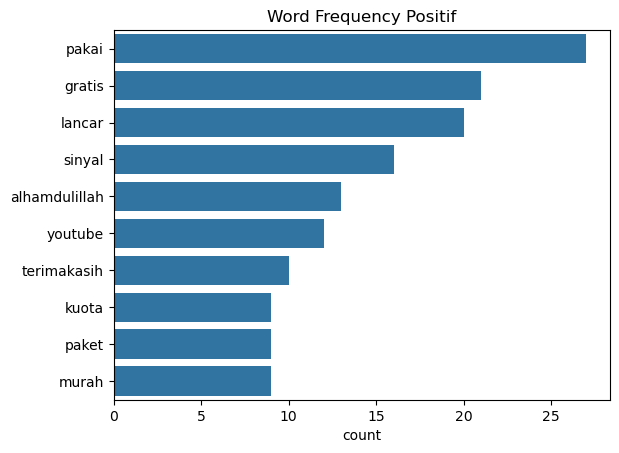

In [15]:
# Positive Word Freqs
word_freq = pd.Series(" ".join(df[df["sentiment"]=="positive"]["text_clean"]).split()).value_counts().head(10)
sns.barplot(word_freq, orient="h")
plt.title("Word Frequency Positif")
plt.show()

#### Insights

Most Dominant Words:

- The word "pakai" (use) indicates that many customers share their experiences in using mobile services.
- The word "gratis" (free) suggests that promotions or free services are highly valued by customers.
- The words "lancar" (smooth) and "sinyal" (signal) show that network quality plays a significant role in customer satisfaction.
- The words "alhamdulillah" and "terimakasih" (thank you) reflect customer satisfaction with the services received.

Business Interpretation:

- Service Reliability: The words "lancar" and "sinyal" indicate that customers appreciate a stable network connection.
- Pricing and Promotions: The words "gratis", "kuota", "paket", and "murah" highlight that customers are highly concerned about pricing and data availability.

Recommendations:

- Maintain network quality and ensure stable connectivity to sustain customer satisfaction.
- Develop more promotions and free service offerings to attract more customers.


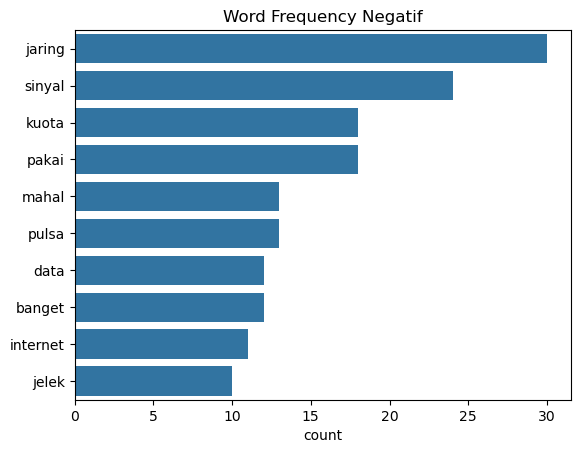

In [16]:
# Negative Word Freqs
word_freq = pd.Series(" ".join(df[df["sentiment"]=="negative"]["text_clean"]).split()).value_counts().head(10)
sns.barplot(word_freq, orient="h")
plt.title("Word Frequency Negatif")
plt.show()

#### Insights

Most Dominant Words:

- The words "jaring" (network) and "sinyal" (signal) have the highest frequency, indicating that many customers complain about poor network quality.
- The words "kuota", "pakai", and "pulsa" suggest dissatisfaction with data quotas, user experience, or prepaid balance pricing.
- The word "mahal" (expensive) signifies that customers feel the service pricing is too high compared to the benefits received.
- The words "jelek", "banget", and "internet" express strong dissatisfaction with internet quality.

Business Interpretation:

- Poor Network Quality and Signal Issues: The words "jaring" and "sinyal" confirm that a major complaint is unstable or frequently disconnected connections.
- Pricing Strategy: The words "mahal", "kuota", and "pulsa" indicate that customers perceive data packages and prepaid balance prices as too high.
- Poor Internet Experience: The words "jelek" and "internet" emphasize that many customers face serious issues with their internet connection.

Recommendations:

- Improve Network Infrastructure: The mobile service provider should invest in enhancing network quality to reduce complaints about signal issues.
- Review Pricing Strategy: If many customers feel the pricing is too high, the company may consider adjusting data package prices to remain competitive.
- Enhance Customer Service: Quickly addressing complaints regarding weak network coverage or unsatisfactory data packages can improve customer satisfaction.

In [17]:
df[df["sentiment"] == "positive"]["text_clean"]

0                                          produk bangsa
1                                    sakti alhamdulillah
6      pakai paket udah ganti paket gratis youtube se...
16                      kangen kirim marchandes langsung
22                                                stabil
                             ...                        
294    siang nyoba bonus telpon pakai kartu aman lanc...
295           pantesan lancar sinyal lancar lombok timur
296                           alhamdulillah lancar pakai
297                         untung pakai internet lancar
298                             ramai lokasi wisata jaya
Name: text_clean, Length: 139, dtype: object

### Word Cloud

Word Cloud is a visual representation of the most frequently occurring words in a text dataset, helping to identify dominant themes and key patterns. By analyzing textual data, such as customer feedback or social media posts, word clouds allow for quick insights into sentiment, recurring topics, and user concerns. In this context, we use a word cloud to highlight frequently used words in positive sentiment texts, enabling a clearer understanding of the language and expressions associated with favorable feedback.

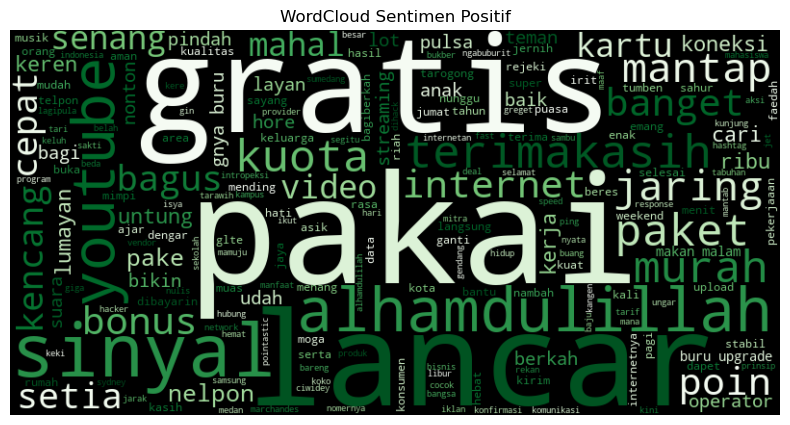

In [18]:
# Positive Wordclouds
positive_text = " ".join(df[df["sentiment"] == "positive"]["text_clean"])
wordcloud_positive = WordCloud(width=800, height=400, background_color="black", colormap="Greens").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Sentimen Positif")
plt.show()

#### Analysis
- The most frequently mentioned words in positive sentiment include "pakai" (use), "gratis" (free), "lancar" (smooth), "terimakasih" (thank you), "bagus" (good), and "senang" (happy).
- Words like "youtube" and "kuota" (quota) suggest that users appreciate good internet service, especially when it supports video streaming.
- The presence of words like "bonus" and "murah" (cheap) indicates that users value affordability and extra benefits in mobile services.
- "Alhamdulillah" (a religious expression for gratitude) appears frequently, implying that satisfied customers often express appreciation for the service.

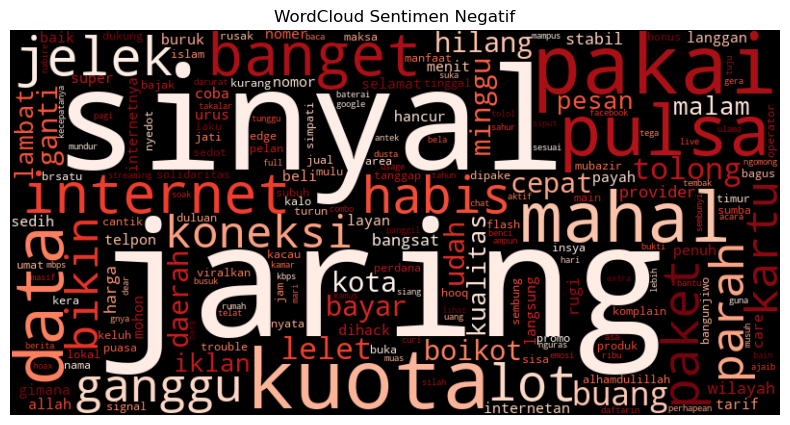

In [19]:
# Negative Wordclouds
negative_text = " ".join(df[df["sentiment"] == "negative"]["text_clean"])
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Sentimen Negatif")
plt.show()

#### Analysis
- The most frequently mentioned words in negative sentiment include "jaring" (network), "sinyal" (signal), "kuota" (quota), "pakai" (use), "mahal" (expensive), "data", and "internet".
- Words like "lelet" (slow), "jelek" (bad), and "habis" (used up) indicate frustrations related to slow connectivity and data limitations.
- Complaints about "harga" (price) and "mahal" (expensive) suggest that users find the service too costly.
- The appearance of "boikot" (boycott) and "parah" (severe) signals strong dissatisfaction among certain users.

## Key Takeaways
- Service Quality Matters: Many complaints revolve around network reliability, speed, and data consumption. Users want a stable and fast connection.
- Affordability Is Key: Both positive and negative reviews frequently mention cost. While some users appreciate affordability, others complain about high prices.
- Streaming & Data Usage Are Priorities: Positive words like "youtube" and "lancar" (smooth) highlight the importance of seamless streaming experiences.
- Negative Experiences Lead to Strong Reactions: The presence of words like "boikot" and "hancur" (ruined) suggests that dissatisfied users express their frustration intensely.

## Recommendations
- Improve Network Stability: Address signal and speed issues to enhance customer satisfaction.
- Offer More Data Benefits: Introduce better data packages and bonuses to meet customer needs.
- Monitor Pricing Strategies: Ensure competitive pricing to retain users and reduce complaints about expensive services.

## Conclusion
The telecommunications industry faces significant challenges in maintaining customer satisfaction due to network instability, high service pricing, and unresponsive customer support. These issues contribute to negative brand perception and reduced customer loyalty. Our analysis highlights three critical gaps: Service Quality Gap, where the promised network performance does not match actual user experience; Communication Gap, caused by ineffective interaction between companies and customers; and Value Perception Gap, where customers feel that the service provided does not justify the cost.

To address these challenges, telecom providers must enhance network stability, offer more customer-centric pricing models, and improve communication and responsiveness in customer service. By closing these gaps, companies can significantly improve user satisfaction, foster long-term customer loyalty, and maintain a competitive advantage in the evolving market. Investing in these improvements will not only resolve current customer concerns but also drive sustainable business growth by aligning service delivery with consumer expectations.